# Unsupervised Learning

Unsupervised learning refers to the use of artificial intelligence (AI) algorithms to identify patterns in data sets containing data points that are neither classified nor labeled. In unsupervised learning, an AI system will group unsorted information according to similarities and differences even though there are no categories provided. Dimensionality reduction and clustering are examples of such learning.

## Dimensionality Reduction

Dimensionality reduction entails scaling down a large number of attributes or columns (features) into a smaller number of attributes or features. The main bojective of this technique is to get the best number of features for classification, regression, and other unsupervised approaches. In machine learning, we face a problem called the curse of dimensionality. This is where there is a large number of attributes or features. This means more data, causing complex models and overfitting problems. 

Dimensionality reduction helps us to deal with the curse of dimensionality. It offers the following benefits:
* It filters redundant and less important features.
* It reduces model complexity with less dimensional data.
* It reduces memory and computation costs for model generation.
* It visualizes high-dimensional data.

## Principal Component Analysis (PCA)

In machine learning, it is considered that having a large amount of data means having a good-quality model for prediction, but a large dataset also poses the challenge of higher dimensionality (or the curse of dimensionality). It causes an increase in complexity for prediction models due to the large number of attributes. PCA is the most commonly used dimensionality reduction method and helps us to identify patterns and correlations in the original dataset to transform it into a lower-dimension dataset with little loss of information.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms.

The main concept of PCA is the discovery of unseen relationships and correlations among attributes in the original dataset. Highly correlated attributes are so similar as to be redundant. Therefore, PCA removes such redundant attributes. 

### What is a principal component?

Principal components are new variables (columns) that are constructed as linear combinations or mixtures of the initial variables (columns). These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the plot below.

![](images/PCA.jpg)



For p-dimensional data (p attributes), the PCA equation can be written as follows:

$PC_j = w_{1j}X_1 + w_{2j}X_2 + ...... + W_{pj}X_p$

Principal components are a weighted sum of all the attributes. Here, $X_1, X_2, ..., X_p$ are the p attributes in the original dataset and $w_{1j}, w_{2j}, ..., w_{pj}$ are the weights of the attributes.


An important thing to realize here is that, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

Geometrically speaking, principal components represent the directions of the data that explain a maximal amount of variance, that is to say, the lines that capture most information of the data. The relationship between variance and information here, is that, the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more the information it has. To put all this simply, just think of principal components as new axes that provide the best angle to see and evaluate the data.

For example, below is a scatter plot of a 2-D dataset. can we guess the first principal component? Yes, it’s approximately the line that matches the purple marks because it goes through the origin and it’s the line in which the projection of the points (red dots) is the most spread out. 
Note the data is centered and the mean is 0.

![](images/PCA2.gif)

### What are eigenvectors and eigenvalues

What you firstly need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues.

It is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.

We can compute the principal components using scipy linear algebra module (linalg).


``Step 1: Center the data and compute its covariance.``

covariance is a measure of the joint variability of two random variables. If the greater values of one variable mainly correspond with the greater values of the other variable, and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive. In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other, (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance therefore shows the tendency in the linear relationship between the variables. The magnitude of the covariance is not easy to interpret because it is not standarized and hence depends on the magnitudes of the variables.



In [2]:
# Import numpy 
import numpy as np

# Import linear algebra module
from scipy import linalg as la
 
# Create dataset
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])
 
# 1. Calculate the covariance matrix
# Center your data
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)
cov

array([[ 2.32222222,  1.61111111, -0.43333333],
       [ 1.61111111,  2.5       , -1.27777778],
       [-0.43333333, -1.27777778,  7.87777778]])

``Step 2: Compute the eigenvalues and eigenvector of the covariance matrix``


[Eigenvector and eigenvalue](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors)


[Transformation Matrix](https://en.wikipedia.org/wiki/Transformation_matrix)


In [3]:
 # 2. Calculate  eigenvalues and eigenvector of the covariance matrix
evals, evecs = la.eig(cov)
print("Eigenvalues:", evals)
print("Eigenvectors:", evecs)

Eigenvalues: [0.74992815+0.j 3.67612927+0.j 8.27394258+0.j]
Eigenvectors: [[-0.70172743  0.69903712 -0.1375708 ]
 [ 0.70745703  0.66088917 -0.25045969]
 [ 0.08416157  0.27307986  0.95830278]]


``Step 3:  Multiply the original data matrix with Eigenvector matrix. ``

We choose two principal components and multiply the original data by the ``sorted`` and selected eigenvectors. The number of components should be equal to the number of eigenvalues greater than 1.

In [5]:
# 3. Multiply the original data matrix with Eigenvector matrix. 
# Sort the Eigen values and vector and select components
# num_components = the number of eigenvalues >1
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]
print("Sorted and Selected Eigen Values:", evals)
print("Sorted and Selected Eigen Vector:", evecs)
 
# Multiply original data and Eigen vector
principal_components=np.dot(data,evecs)
print("Principal Components:", principal_components)

Sorted and Selected Eigen Values: [8.27394258+0.j 3.67612927+0.j]
Sorted and Selected Eigen Vector: [[-0.1375708   0.69903712]
 [-0.25045969  0.66088917]
 [ 0.95830278  0.27307986]]
Principal Components: [[-2.15142276 -0.17311941]
 [ 3.80418259 -2.88749898]
 [ 0.15321328 -0.98688598]
 [-4.7065185   1.30153634]
 [ 1.29375788  2.27912632]
 [ 4.0993133   0.1435814 ]
 [-1.62582148 -2.23208282]
 [ 2.11448986  3.2512433 ]
 [-0.2348172   0.37304031]
 [-2.74637697 -1.06894049]]


We can use PCA module from sklearn to compute PCA.

In [21]:
# Import pandas and PCA
import pandas as pd

# Import principal component analysis
from sklearn.decomposition import PCA
 
# Create dataset
data=np.array([[7., 4., 3.],
               [4., 1., 8.],
               [6., 3., 5.],
               [8., 6., 1.],
               [8., 5., 7.],
               [7., 2., 9.],
               [5., 3., 3.],
               [9., 5., 8.],
               [7., 4., 5.],
               [8., 2., 2.]])
 
# Create and fit PCA Model
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
 
components_df = pd.DataFrame(data = components, 
                                       columns = ['principal_component_1', 'principal_component_2'])
print(components_df)

   principal_component_1  principal_component_2
0               2.151423              -0.173119
1              -3.804183              -2.887499
2              -0.153213              -0.986886
3               4.706518               1.301536
4              -1.293758               2.279126
5              -4.099313               0.143581
6               1.625821              -2.232083
7              -2.114490               3.251243
8               0.234817               0.373040
9               2.746377              -1.068940


## Clustering

Clustering means grouping items that are similar to each other. Grouping similar products, grouping similar articles or documents, and grouping similar customers for market segmentation are all examples of clustering. The core principle of clustering is minimizing the intra-cluster distance and maximizing the intercluster distance. 
* The intra-cluster distance is the distance between data items within a cluster.
* The intercluster distance is the distance between different clusters.

The data points are not labeled, so clustering is a kind of unsupervised problem. As we are combining similar data points, the question that arises here is how to find the similarity between two data points so we can group similar data into the same cluster. To measure the similarity or dissimilarity between data points, we can use ``distance measures`` such as Euclidean, Manhattan, and Minkowski distance:

Euclidean Distance $= \sqrt{\sum_{n=1}^{k} (x_i - y_i)^2}$

Manhattan Distance $= \sum_{n=1}^{k} |x_i - y_i|$

Minkowski Distance $= (\sum_{n=1}^{k} |x_i - y_i|^p)^{1/q}$

Minkowski distance is typically used with p being 1 or 2, which correspond to the Manhattan distance and the Euclidean distance, respectively.


## Finding Number of Clusters

### The Elbow Method

The elbow method is a well-known method for finding out the best number of clusters. In this method, we focus on the percentage of variance for the different numbers of clusters. (Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.) The core concept of this method is to select the number of clusters that appending another cluster should not cause a huge change in the variance. We use the sum of squares within a cluster using the number of clusters to find the optimal number of clusters. The sum of squares is also known as the ``Within-Cluster Sum of Squares (WCSS)``:

WCSS $= \sum_{j=1}^{k} \sum_{i}^{n} distance(x_i, C_j)^2$

where k is the number of clusters, $C_j$ is the cluster centroid, and $x_i$ is the data points in each cluster.

C:\Users\jxie\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


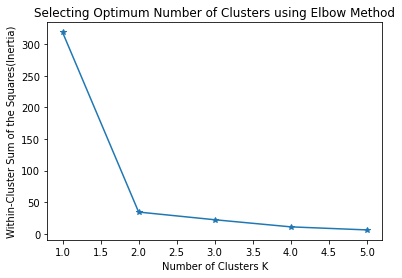

In [1]:
# import pandas
import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

# import K-means 
from sklearn.cluster import KMeans
 
# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
wcss_list = []
# Run a loop for different value of number of cluster
for i in range(1, 6):
    # Create and fit the KMeans model
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    # Add the WCSS or inertia of the clusters to the score_list
    wcss_list.append(kmeans_model.inertia_)

# Plot the inertia(WCSS) and number of clusters    
plt.plot(range(1, 6), wcss_list,  marker='*')
# set title of the plot
plt.title('Selecting Optimum Number of Clusters using Elbow Method')
# Set x-axis label
plt.xlabel('Number of Clusters K')
# Set y-axis label
plt.ylabel('Within-Cluster Sum of the Squares(Inertia)')
# Display plot
plt.show()

## K-Means Clustering

K-means is one of the simplest, most popular, and most well-known clustering algorithms. It is a kind of partitioning clustering method. It partitions input data by defining random initial cluster centroids based on a given number of clusters. Next, it associates the data items to the nearest cluster centroid using Euclidean distance. After each data point is assigned to a cluster, reassign the centroid value for each cluster to be the mean value of all the data points within the cluster. Essentially, the process goes as follows:

* Select k centroids randomly or manually. These will be the center point for each segment.
* Assign data points to nearest centroid.
* Reassign centroid value to be the calculated mean value for each cluster.
* Reassign data points to nearest centroid.
* Repeat until data points stay in the same cluster.

[Check this Web for visualizing K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

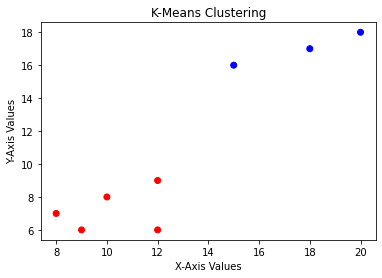

In [2]:
# import pandas 
import pandas as pd

# import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import K-means
from sklearn.cluster import KMeans

# Create a DataFrame
data=pd.DataFrame({"X":[12,15,18,10,8,9,12,20],
             "Y":[6,16,17,8,7,6,9,18]})
 
# Define number of clusters
num_clusters = 2
 
# Create and fit the KMeans model
km = KMeans(n_clusters=num_clusters)
km.fit(data)
 
# Predict the target variable
pred=km.predict(data)
 
# Plot the Clusters
plt.scatter(data.X,data.Y,c=pred, marker="o", cmap="bwr_r")
# Set title of the plot 
plt.title('K-Means Clustering')
# Set x-axis label
plt.xlabel('X-Axis Values')
# Set y-axis label
plt.ylabel('Y-Axis Values')
# Display the plot
plt.show()